In [4]:
# 시스템
import os
import sys
import re
# 크롤링
import urllib.request
import requests
import json
from scrapy.http import TextResponse
from bs4 import BeautifulSoup
from selenium import webdriver

import pandas as pd

In [2]:
# url = "https://search.naver.com/search.naver?&nso=&where=blog&sm=tab_opt&query="

def item_parsing(search_word):
    
    blog_search = naver_api(search_word)
    
    blog_result = []
    for blog in blog_search["items"]:
    
        # 이름
        user_name = blog["bloggerlink"][23:]

        # 블로그 코드
        blog_code = blog["link"][blog["link"].find("logNo=") + 6:]

        blog_result.append(f"https://blog.naver.com/PostView.naver?blogId={user_name}&logNo={blog_code}")
        
    return blog_result
        
    

In [3]:
import re
def tag_remove(word):

    word = re.sub('(<([^>]+)>)', '', word)

    return word

In [9]:
# url = "https://search.naver.com/search.naver?&nso=&where=blog&sm=tab_opt&query="

def item_parsing2(search_word):
    
    blog_search = naver_api(search_word)
    
    # result : url
    # writer : 작성자 이름
    # code : 블로그 코드
    # title : 블로그 제목
    # description : 블로그 요약 설명
    blog_result = []
    blog_writer = []
    blog_code = []
    blog_title = []
    blog_description = []

    for blog in blog_search["items"]:
    
        # 이름
        writer = blog["bloggerlink"][23:]
        blog_writer.append(writer)
        
        # 블로그 코드
        code = blog["link"][blog["link"].find("logNo=") + 6:]
        blog_code.append(code)
        # 제목
        title = tag_remove(blog["title"])
        blog_title.append(title)
        
        # 블로그 요약
        description = tag_remove(blog["description"])
        blog_description.append(description)

        blog_result.append(f"https://blog.naver.com/PostView.naver?blogId={writer}&logNo={code}")
        
        
        
    return blog_result, blog_writer, blog_code, blog_title, blog_description
        
    

In [5]:
def naver_api(search_word):
    client_id = "GvNa2sBgFDA6v7ujnaz0"
    client_secret = "Yo0jOskXlZ"
    
    encText = urllib.parse.quote(search_word)
    
    url = "https://openapi.naver.com/v1/search/blog?display=30&query=" + encText # json 결과

    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
    else:
        print("Error Code:" + rescode)
    return json.loads(response_body.decode('utf-8'))

In [6]:
def blog_content_parsing(url):
    blog_req = requests.get(url)
    blog_bs = BeautifulSoup(blog_req.text, "html.parser")
    
    result = []
    
    for i in blog_bs.select(".se-text"):
        for j in i.select(".se-module-text > p"):
            txt = j.text
            if txt != "\u200b":
                result.append(preprocess_sentence_kr(txt))
                
                
            
            
    return result


In [7]:
def preprocess_sentence_kr(w):
    w = w.strip()
    w = re.sub(r"[^0-9가-힣?.!,¿]+", " ", w) # \n도 공백으로 대체해줌
    w = w.strip()
    return w

In [9]:
search_word = input("검색하고 싶은 단어를 입력해주세요.")

검색하고 싶은 단어를 입력해주세요.랩씨 마카롱 스마트 커버 후기


In [37]:
test = item_parsing2("lg 스탠바이미 후기")
test

(['https://blog.naver.com/PostView.naver?blogId=haree42&logNo=222515987889',
  'https://blog.naver.com/PostView.naver?blogId=2hailin&logNo=222658923116',
  'https://blog.naver.com/PostView.naver?blogId=ksy7298&logNo=222546983672',
  'https://blog.naver.com/PostView.naver?blogId=hiphoparr&logNo=222630821609',
  'https://blog.naver.com/PostView.naver?blogId=schneesun85&logNo=222641462596',
  'https://blog.naver.com/PostView.naver?blogId=dreaminguth&logNo=222637214855',
  'https://blog.naver.com/PostView.naver?blogId=gladys93&logNo=222523176060',
  'https://blog.naver.com/PostView.naver?blogId=00dream00&logNo=222651006306',
  'https://blog.naver.com/PostView.naver?blogId=choco_vanila&logNo=222523694296',
  'https://blog.naver.com/PostView.naver?blogId=smilesong2&logNo=222551669309',
  'https://blog.naver.com/PostView.naver?blogId=pgo3549&logNo=222665384884',
  'https://blog.naver.com/PostView.naver?blogId=forever2131&logNo=222461685613',
  'https://blog.naver.com/PostView.naver?blogId=leo

In [38]:
a,b,c,d,e = test

In [39]:
result = []
result.append(" ".join(blog_content_parsing(a[0])))

In [40]:
result

['스탠바이미 한달만에 받은 내돈내산 후기 안녕하세요 도뜨입니다. 오늘은 근 한달정도 걸려 받은 스탠바이미 내돈내산 후기로 찾아왔는데요 품절이라 쓸까 말까하다가 ! 일상에 잠시 적었던 사진으로 들어오시는 분들이 좀따리 있어서 찍어둔사진을 풀어보도록할게요. 도뜨네는 스탠바이미를 8월 12일 오전9시에 공식홈페이지에서 구매했구요. 스탠바이미 가격은 104만원! 엘지 공식홈페이지 한정판이라 그런지 창조경제를 하시는 분들이 많아 스탠바이미 미개봉 가격은 120만원이상 하더라고요 해상도 등의 경우 말이 많은 편이고 가격대비 훌륭하다는 느낌은 잘 모르겠어요. 배터리가 굉장히 아쉽다는 점..? 사용하지않아도 야금야금.. 사용할 때도 야금야금.. 무선으로 잘 사용할 수 있을까란 생각도 드는 제품이었달까. 그냥 이쁘니까 이쁜.. 용, 인테리어용... 커다란 태블릿 를 구매한 그런느낌? 두둥 도뜨네는 스탠바이미를 완제품으로 배송받을 줄 알았는데 엘지 설치기사 두분이 오셔서 뚝딱! 조립해주셨어요. 아무래도 이게 한정판 제품이다보니 조립하는게 낯설어서 조립설명서를 꼼꼼하게 보시면서 열심히 조립해주셨어요. 엘지 기사분들이 얼마나 재미있으신지 남편이랑 농담따먹기를.. 즐겁게 하고가셨답니다. 두둥 그렇게 완성된 스탠바이미 우리집이랑은 잘 어울리지 않는 세련된 디자인이지만 아주 마음에 들더라고요. 무선제품이다보니! 충전만 이렇게 유선으로 해주고나면 이리저리 데리고 다니며 사용할 수 있다는 장점 그리고 와이파이를 연결해서 앱으로 를 볼 수 있는 장점이 있었답니다. 첫 인상은, 예쁘다? 정도 스탠바이미의 해상도가 많이 떨어진다는 말이 있는데 보통 티비랑 크게 다르지 않단 느낌이 들었답니다. 그냥 보통 우리가 보는 일반 티비 수준인 것 같은데 4 로 보시는 분들이 많으신가용? 전 해상도가 부족하단 느낌은 크게 안들더라고요 높이 조절은 이렇게 모니터 뒷편에 있는 홈으로 슬라이딩해서 조절할 수 있었구요. 예전에 삼성에서 나온 가로세로 라고해야하나? 가수 청하가 나와 광고를 했던 그 처럼 가로세로로

In [41]:
result = []
for i in a:
    result.append(" ".join(blog_content_parsing(i)))

In [24]:
len(result)

30

In [25]:
result

['랩씨 마카롱 아이패드 케이스가 유명하다고 해서 바로 구매해봤어요! 우리 아이패드님을 위해 아낌없는 투자! 랩씨 슬림 핏 케이스 마카롱이라고 써져있네요 저는 아이패드 프로 12.9인치로 고르고 애플매장에서도 이거 팔길래 쿠팡으로 조금이나마 싸게 구매했어요! 색은 요즘 제가 제일 좋아하는 색! 라벤더색으로 골랐어요 파스텔톤의 연보라가 너무 예쁘잖아요  완전 튼튼해보이고 포장도 꼼꼼하게 되어있어요! 케이스안에는 랩씨라고 적혀 있네요! 튼튼해보이지만 두께가 2 으로 슬림하다는거! 안에 충격흡수 쿠션의 소재여서 만져보면 부드럽고 약간 폭신함을 느낄수 있어요! 랩씨 아이패드케이스의 외부는 매끄럽게 특수 코팅이 되어있어서 땀이나 물에 젖은 손으로 만져도 쉽게 미끄러지지 않는다고 해요! 오 겉면도 맘에들어! 스마트 커버? 커버를 열고 닫으면 켜졌다 꺼졌다하는게 스마트 커버인가요? 신기해서 놀랬어요 촌스러운거 티냄 이거 완전좋아요 꼭 스마트커버로 구매하세요! 다각도로 조절하는 거치기능도 당연히 있는데요! 자 지지대로 낮게 아이패드를 거치할 수있어서 그림작업할때 너무 좋을 것 같아요! 요건 삼각 지지대 저는 요각도는 영상시청할때 유용하기 사용중이에요! 안전감있고 편한 각도가 너무 맘에들어!! 고정력이 생각보다 강하고 안정되서 너무 맘에 들고 뭣보다 튼튼한게 진짜 좋은 것같아요! 랩씨 슬림핏 마카롱 스마트 커버 아이패드 12.9인치 5세대 ,라벤더 케이스 포스팅이었습니다1',
 '안녕하세요 이전에 아이패드 랩씨 종이질감 필름 부착, 사용후기에 대한 내용을 썼었는데요! 랩씨 종이질감 필름 후기 오늘은 아이패드 케이스중에서 색감으로 유명한 랩씨 마카롱 스마트 커버 케이스와 랩씨 애플펜슬 스킨 보호필름에 대한 사용후기를 써보려해요! 기존에 애플펜슬에 사용하던 분홍색 실리콘케이스에요! 케이스 위에 달려있는 곰돌이가 넘 귀여워서 사서 썼어요 케이스는 애플 정품 스마트커버! 커버가 패드 옆면 커넥트 부분에 딱 붙어서 잡고 흔들어도 패드가 떨어지진 않았어요 근데 이 커버가 너무 얇고 애플

In [42]:
df = pd.DataFrame()

In [43]:
df["url"] = a
df["writer"] = b
df["title"] = d
df["description"] = e
df["content"] = result

In [44]:
df.to_csv("craw.csv", index= False,encoding="utf-8-sig")

In [116]:
result = []
for i in item_parsing(search_word):
    
    result.append(blog_content_parsing(i))

In [117]:
result

[['랩씨 마카롱 아이패드 케이스가 유명하다고 해서',
  '바로 구매해봤어요!',
  '우리 아이패드님을 위해 아낌없는 투자!',
  '랩씨 슬림 핏 케이스 마카롱이라고 써져있네요',
  '저는 아이패드 프로 12.9인치로 고르고',
  '애플매장에서도 이거 팔길래 쿠팡으로 조금이나마 싸게',
  '구매했어요!',
  '색은 요즘 제가 제일 좋아하는 색!',
  '라벤더색으로 골랐어요 파스텔톤의',
  '연보라가 너무 예쁘잖아요',
  '',
  '완전 튼튼해보이고 포장도 꼼꼼하게 되어있어요!',
  '케이스안에는 랩씨라고 적혀 있네요!',
  '튼튼해보이지만 두께가 2 으로 슬림하다는거!',
  '안에 충격흡수 쿠션의 소재여서 만져보면',
  '부드럽고 약간 폭신함을 느낄수 있어요!',
  '랩씨 아이패드케이스의 외부는 매끄럽게 특수 코팅이 되어있어서',
  '땀이나 물에 젖은 손으로 만져도 쉽게 미끄러지지 않는다고 해요!',
  '오 겉면도 맘에들어!',
  '스마트 커버? 커버를 열고 닫으면 켜졌다 꺼졌다하는게',
  '스마트 커버인가요?',
  '신기해서 놀랬어요 촌스러운거 티냄',
  '이거 완전좋아요 꼭 스마트커버로 구매하세요!',
  '다각도로 조절하는 거치기능도 당연히 있는데요!',
  '자 지지대로 낮게 아이패드를 거치할 수있어서',
  '그림작업할때 너무 좋을 것 같아요!',
  '요건 삼각 지지대 저는 요각도는',
  '영상시청할때 유용하기 사용중이에요!',
  '안전감있고 편한 각도가 너무 맘에들어!!',
  '고정력이 생각보다 강하고 안정되서 너무 맘에 들고',
  '뭣보다 튼튼한게 진짜 좋은 것같아요!',
  '랩씨 슬림핏 마카롱 스마트 커버',
  '아이패드 12.9인치 5세대 ,라벤더 케이스 포스팅이었습니다1'],
 ['안녕하세요',
  '이전에 아이패드 랩씨 종이질감 필름 부착, 사용후기에 대한 내용을 썼었는데요!',
  '랩씨 종이질감 필름 후기',
  '오늘은 아이패드 케이스중에서 색감으로 유명한',
  '랩씨 마카롱 스마트

In [107]:
result[9]

['\u200b',
 '아이패드 에어3 케이스',
 '내돈내산 랩씨 아이패드 마카롱 케이스, 스코코 종이질감 필름 장단점 솔직후기',
 '\u200b',
 '#아이패드 #아이패드에어3 #아이패드케이스 #랩씨아이패드케이스 #타오바오케이스',
 '#아이패드악세사리 #애플펜슬 #또룬 #또룬블로그',
 '\u200b',
 '\u200b',
 '\u200b',
 '안녕하세요 또룬입니다 ๑•‿•๑ ',
 '오늘 포스팅은 공부하려고 책상에 앉았다가 집중이 안되어서 쓰는 리뷰입니다 ㅋㅋㅋ 일요일이라 그런지 책상에 가만히 앉아있는 것도 버거운 너낌이에요ㅎㅎ 최근에 업로드한 아이패드 에어3 언박싱 포스팅에 이어 이번에는 제가 사용하고 있는 에어3 악세사리에 대해서 리뷰해보고자 합니다 : )',
 '아이패드만 구매하면 아이패드병 완치될줄 알았는데 사고나니까 이것저것 사야할게 참 많은 것 같아요. 이를테면 아이패드 케이스, 필름, 파우치 등등 …',
 '저도 여러가지 브랜드의 다양한 제품을 사용해봤는데 1년 사용 솔직후기는 드물길래 제가 한 번 솔직후기 남겨볼게요~',
 '\u200b',
 '\u200b',
 '🍎🍎 우선 제가 사용하는 아이패드 스펙에 대해 간략하게 설명하자면 애플스토어 가로수길 가서 직접 구매하였고,',
 ' ipad air 3 아이패드 에어3 스페이스그레이 64GB 이며, 구매날짜는 2020년 01월 29일 입니다 *0* 🍎🍎',
 '\u200b',
 '\u200b',
 '\u200b',
 '↑↑ 개봉기 포스트는 이쪽을 클릭 ↑↑',
 '\u200b',
 '\u200b',
 '\u200b',
 '아이패드 구매한 뒤 살까말까 가장 많이 고민한게 바로 랩씨 케이스 에요. 검색했더니 랩씨만큼 예쁜 색감의 케이스는 찾기 어려웠는데 가격이 다른 케이스에 비해서 좀 많이 비싼편이었어요. 그래서 그 가격이면 애플 정품 케이스를 사는게 더 낫지 않을까? 라는 생각을 하게되었습니다.',
 '\u200b',
 '애플 정품 케이스 vs 랩씨 스마트커버 케이스',
 '그런데 애플 정

In [13]:

a = {}

a["name"] = 123
a["blog"] = 1233

In [14]:
a

{'name': 123, 'blog': 1233}

In [2]:
item_name = "랩씨 마카롱 스마트 커버 후기"

In [3]:
url = "https://search.naver.com/search.naver?&nso=&where=blog&sm=tab_opt&query="

In [4]:
craw_url = url+ item_name

In [5]:
craw_url

'https://search.naver.com/search.naver?&nso=&where=blog&sm=tab_opt&query=랩씨 마카롱 스마트 커버 후기'

In [6]:
req = requests.get(craw_url)
req

<Response [200]>

In [7]:
req.text[:500]

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="랩씨 마카롱 스마트 커버 후기 : 네이버 블로그검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'랩씨 마카롱 스마트 커버 후기\'의 네이버 VIEW검색 결과'

<!DOCTYPE html>
 <html lang="ko"> <head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="랩씨 마카롱 스마트 커버 후기 : 네이버 블로그검색" property="og:title"> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'랩씨 마카롱 스마트 커버 후기'의 네이버 VIEW검색 결과입니다." property="og:description"/> <meta content="'랩씨 마카롱 스마트 커버 후기'의 네이버 VIEW검색 결과입니다." lang="ko" name="description"/> <title>랩씨 마카롱 스마트 커버 후기 : 네이버 블로그검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_220324.css" rel="stylesheet" typ
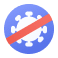
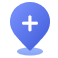
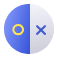
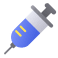
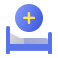

In [8]:
bs = BeautifulSoup(req.text, 'html.parser')
bs

In [9]:
test = bs.select("#_view_review_body_html > div > more-contents > div > ul > li")
len(test)

30

In [10]:
test[0]

<li class="bx" id="sp_blog_1"> <div class="total_wrap api_ani_send"> <div class="total_area"> <div class="total_info"> <div class="api_save_group _keep_wrap"> <a aria-pressed="false" class="btn_save _keep_trigger" data-cr-off="a=blg*a.kep&amp;r=1&amp;i=90000003_0000000000000033D7CF396F&amp;u=javascript" data-cr-on="a=blg*a.kep&amp;r=1&amp;i=90000003_0000000000000033D7CF396F&amp;u=javascript" data-url="https://blog.naver.com/ahwl555?Redirect=Log&amp;logNo=222664014191" href="javascript:;" role="button"><i class="spnew ico_save">문서 저장하기</i></a> <div class="api_ly_save _keep_save_layer"> <a class="spnew_af item item_save _keep_save" data-cr-off="a=blg*a.kepoff&amp;r=1&amp;i=90000003_0000000000000033D7CF396F&amp;u=javascript" data-cr-on="a=blg*a.kepon&amp;r=1&amp;i=90000003_0000000000000033D7CF396F&amp;u=javascript" href="javascript:;" role="button">Keep에 저장</a> <a class="spnew_af item item_quick" href="https://keep.naver.com/" onclick="return goOtherCR(this, 'a=blg*a.kephome&amp;r=1&amp;i

In [11]:
test[0].select_one("div > a").get("data-url")

'https://blog.naver.com/ahwl555?Redirect=Log&logNo=222664014191'

In [13]:
blog_url = []
for i in test:
    print(i.select_one("div > a").get("data-url"))
    blog_url.append(i.select_one("div > a").get("data-url"))
    

https://blog.naver.com/ahwl555?Redirect=Log&logNo=222664014191
https://blog.naver.com/tree19971028?Redirect=Log&logNo=222087218662
https://blog.naver.com/ksyun0908?Redirect=Log&logNo=222482740762
https://blog.naver.com/myittndus937?Redirect=Log&logNo=221898333285
https://blog.naver.com/syralove?Redirect=Log&logNo=221996683105
https://blog.naver.com/dodoandmimi?Redirect=Log&logNo=221911357440
https://blog.naver.com/yungcoke_?Redirect=Log&logNo=222155709962
https://blog.naver.com/g9bonyam?Redirect=Log&logNo=221581709797
https://blog.naver.com/lamia77?Redirect=Log&logNo=222287507075
https://blog.naver.com/nylah468?Redirect=Log&logNo=222226659720
https://blog.naver.com/h_e_lovely?Redirect=Log&logNo=221703349808
https://blog.naver.com/closee_123?Redirect=Log&logNo=222023386551
https://blog.naver.com/dailychaenie?Redirect=Log&logNo=221842742036
https://blog.naver.com/purebrandy?Redirect=Log&logNo=222605684107
https://blog.naver.com/dowdow200?Redirect=Log&logNo=221631910914
https://blog.naver

In [14]:
# 블로그 글 크롤링 진행

In [15]:
blog_url = blog_url[0]
blog_url

'https://blog.naver.com/ahwl555?Redirect=Log&logNo=222664014191'

In [16]:
blog_url

'https://blog.naver.com/ahwl555?Redirect=Log&logNo=222664014191'

In [18]:
test = "https://blog.naver.com/PostView.naver?blogId=ahwl555&logNo=222664014191&redirect=Dlog&widgetTypeCall=true&topReferer=https%3A%2F%2Fsearch.naver.com%2Fsearch.naver%3F%26nso%3D%26where%3Dblog%26sm%3Dtab_opt%26query%3D%25EB%259E%25A9%25EC%2594%25A8%2520%25EB%25A7%2588%25EC%25B9%25B4%25EB%25A1%25B1%2520%25EC%258A%25A4%25EB%25A7%2588%25ED%258A%25B8%2520%25EC%25BB%25A4%25EB%25B2%2584%2520%25ED%259B%2584%25EA%25B8%25B0&directAccess=false"

In [22]:
test

'https://blog.naver.com/PostView.naver?blogId=ahwl555&logNo=222664014191&redirect=Dlog&widgetTypeCall=true&topReferer=https%3A%2F%2Fsearch.naver.com%2Fsearch.naver%3F%26nso%3D%26where%3Dblog%26sm%3Dtab_opt%26query%3D%25EB%259E%25A9%25EC%2594%25A8%2520%25EB%25A7%2588%25EC%25B9%25B4%25EB%25A1%25B1%2520%25EC%258A%25A4%25EB%25A7%2588%25ED%258A%25B8%2520%25EC%25BB%25A4%25EB%25B2%2584%2520%25ED%259B%2584%25EA%25B8%25B0&directAccess=false'

In [53]:
test = "https://blog.naver.com/PostView.naver?blogId=ahwl555&logNo=222664014191"

In [54]:
blog_req = requests.get(test)
blog_bs = BeautifulSoup(blog_req.text, "html.parser")

In [52]:
craw_url

'https://search.naver.com/search.naver?&nso=&where=blog&sm=tab_opt&query=랩씨 마카롱 스마트 커버 후기'

In [24]:
# 본문 내용이 들어있는 곳
first = blog_bs.select("#postListBody")

# post_1
second = first.select("#post_1")

# #post-back

# #printPost1

# #post-view222664014191 => 

    # #se-main-container => 내용이 들어있다.

# #post_footer_contents => 태그값이 들어있다.


[<div id="postListBody">
 <div class="post _post_wrap _param(1)" data-post-editor-version="4" id="post_1">
 <div class="post-back">
 <table cellpadding="0" cellspacing="0" class="post-head"><tr><td class="htl" nowrap="nowrap"></td><td class="htc"></td><td class="htr" nowrap="nowrap"></td></tr></table>
 <table cellpadding="0" cellspacing="0" class="post-body" id="printPost1" role="presentation">
 <tr>
 <td class="bcl" nowrap="nowrap"></td>
 <td class="bcc">
 <div class="wrap_rabbit pcol2 _param(1) _postViewArea222664014191" id="post-view222664014191">
 <!-- Rabbit HTML --><div class="se-viewer se-theme-default" lang="ko-KR">
 <!-- SE_DOC_HEADER_START -->
 <div class="se-component se-documentTitle se-l-default" id="SE-75D544C0-FD03-44D3-A385-D8BB79D4A1CC">
 <div class="se-component-content">
 <div class="se-section se-section-documentTitle se-l-default se-section-align-center">
 <!-- -->
 <div class="blog2_series">
 <a class="pcol2" href="/PostList.naver?blogId=ahwl555&amp;categoryNo=12&

In [27]:
test = blog_bs.select(".se-main-container")
test

[<div class="se-main-container">
 <div class="se-component se-image se-l-default" id="SE-064DECBB-E6B1-4D49-9B59-83A845D04CB0">
 <div class="se-component-content se-component-content-normal">
 <div class="se-section se-section-image se-l-default se-section-align-center" style="max-width:900px;">
 <div class="se-module se-module-image" style="">
 <a class="se-module-image-link __se_image_link __se_link" data-linkdata='{"id" : "SE-064DECBB-E6B1-4D49-9B59-83A845D04CB0", "src" : "https://postfiles.pstatic.net/MjAyMjAzMDRfMTU3/MDAxNjQ2MzkyMzQ5MDM1.sSJkYrCQtaTQ1sEuWGO3Pa9QD_7v4KLD34AoyFcT5WQg.elBfk632BsNPuj4TZ2ze3EroReAp9IuEx9frcRtZO0Ig.JPEG.ahwl555/IMG_0544.jpg", "originalWidth" : "900", "originalHeight" : "1170", "linkUse" : "false", "link" : ""}' data-linktype="img" href="#" onclick="return false;" style="">
 <img alt="" class="se-image-resource" data-height="1170" data-lazy-src="https://postfiles.pstatic.net/MjAyMjAzMDRfMTU3/MDAxNjQ2MzkyMzQ5MDM1.sSJkYrCQtaTQ1sEuWGO3Pa9QD_7v4KLD34AoyFcT5W

In [32]:
type(blog_bs)

bs4.BeautifulSoup

In [36]:
test = blog_bs.select(".se-text")[0]
test

<div class="se-component se-text se-l-default" id="SE-B1518656-64EB-4B5E-ABAD-8A1D7BF85BE9">
<div class="se-component-content">
<div class="se-section se-section-text se-l-default">
<div class="se-module se-module-text">
<!-- SE-TEXT { --><p class="se-text-paragraph se-text-paragraph-align-center" id="SE-4058346C-9C56-4D51-A486-F3AFE666696E" style=""><span class="se-fs- se-ff-" id="SE-4B79D8D2-6889-4D22-9490-C3F8A493BF0B" style="">​</span></p><!-- } SE-TEXT --><!-- SE-TEXT { --><p class="se-text-paragraph se-text-paragraph-align-center" id="SE-1A7F86B9-140D-4124-AFF2-A2198D5693A6" style=""><span class="se-fs- se-ff-" id="SE-0E2CE4D1-CBA4-41FD-BFB2-FB19A0CBE619" style="">랩씨 마카롱 아이패드 케이스가 유명하다고 해서</span></p><!-- } SE-TEXT --><!-- SE-TEXT { --><p class="se-text-paragraph se-text-paragraph-align-center" id="SE-83D8C1D4-339C-492E-A7FA-A3CEA8BB13D8" style=""><span class="se-fs- se-ff-" id="SE-031CD64E-4A9E-4C8F-BF47-B5BB6FC6E7C3" style="">바로 구매해봤어요!</span></p><!-- } SE-TEXT --><!-- SE-TEXT {

In [46]:
result = []
for i in test.select(".se-module-text > p"):
    print(i.text)


​

랩씨 마카롱 아이패드 케이스가 유명하다고 해서

바로 구매해봤어요!

우리 아이패드님을 위해 아낌없는 투자! 

​



In [47]:
for i in blog_bs.select(".se-text"):
    for j in i.select(".se-module-text > p"):
        print(j.text)

​
랩씨 마카롱 아이패드 케이스가 유명하다고 해서
바로 구매해봤어요!
우리 아이패드님을 위해 아낌없는 투자! 
​
​
랩씨 슬림 핏 케이스 마카롱이라고 써져있네요
저는 아이패드 프로 12.9인치로 고르고
애플매장에서도 이거 팔길래 쿠팡으로 조금이나마 싸게
구매했어요!
​
​
색은 요즘 제가 제일 좋아하는 색!
라벤더색으로 골랐어요 파스텔톤의
연보라가 너무 예쁘잖아요ㅠㅠ
​
​
​
 
완전 튼튼해보이고 포장도 꼼꼼하게 되어있어요!
케이스안에는 랩씨라고 적혀 있네요!
​
튼튼해보이지만 두께가 2mm으로 슬림하다는거!
안에 충격흡수 쿠션의 소재여서 만져보면
부드럽고 약간 폭신함을 느낄수 있어요!
​
​
랩씨 아이패드케이스의 외부는 매끄럽게 특수 코팅이 되어있어서
땀이나 물에 젖은 손으로 만져도 쉽게 미끄러지지 않는다고 해요!
오 겉면도 맘에들어!
​
​
스마트 커버? 커버를 열고 닫으면 켜졌다 꺼졌다하는게
스마트 커버인가요?
신기해서 놀랬어요ㅋㅋㅋ촌스러운거 티냄
이거 완전좋아요 꼭 스마트커버로 구매하세요!
​
​
​
다각도로 조절하는 거치기능도 당연히 있는데요!
​
ㄱ자 지지대로 낮게 아이패드를 거치할 수있어서
그림작업할때 너무 좋을 것 같아요!
​
​
요건 삼각 지지대 저는 요각도는
영상시청할때 유용하기 사용중이에요!
안전감있고 편한 각도가 너무 맘에들어!!
​
​
고정력이 생각보다 강하고 안정되서 너무 맘에 들고
뭣보다 튼튼한게 진짜 좋은 것같아요!😄
​
랩씨 슬림핏 마카롱 스마트 커버 
아이패드 12.9인치 5세대 ,라벤더 케이스 포스팅이었습니다1 : )


In [ ]:
#postListBody

In [71]:
len(blog_test)

22

In [ ]:
#SE-0E2CE4D1-CBA4-41FD-BFB2-FB19A0CBE619

In [85]:
t = blog_test[2].select_one("div")
t

<div class="se-component-content">
<div class="se-section se-section-text se-l-default">
<div class="se-module se-module-text">
<!-- SE-TEXT { --><p class="se-text-paragraph se-text-paragraph-align-center" id="SE-4058346C-9C56-4D51-A486-F3AFE666696E" style=""><span class="se-fs- se-ff-" id="SE-4B79D8D2-6889-4D22-9490-C3F8A493BF0B" style="">​</span></p><!-- } SE-TEXT --><!-- SE-TEXT { --><p class="se-text-paragraph se-text-paragraph-align-center" id="SE-1A7F86B9-140D-4124-AFF2-A2198D5693A6" style=""><span class="se-fs- se-ff-" id="SE-0E2CE4D1-CBA4-41FD-BFB2-FB19A0CBE619" style="">랩씨 마카롱 아이패드 케이스가 유명하다고 해서</span></p><!-- } SE-TEXT --><!-- SE-TEXT { --><p class="se-text-paragraph se-text-paragraph-align-center" id="SE-83D8C1D4-339C-492E-A7FA-A3CEA8BB13D8" style=""><span class="se-fs- se-ff-" id="SE-031CD64E-4A9E-4C8F-BF47-B5BB6FC6E7C3" style="">바로 구매해봤어요!</span></p><!-- } SE-TEXT --><!-- SE-TEXT { --><p class="se-text-paragraph se-text-paragraph-align-center" id="SE-191304BC-3253-4672-B98

In [91]:
for te in t:
    print("Tes")
    print(te)
    print()

Tes



Tes
<div class="se-section se-section-text se-l-default">
<div class="se-module se-module-text">
<!-- SE-TEXT { --><p class="se-text-paragraph se-text-paragraph-align-center" id="SE-4058346C-9C56-4D51-A486-F3AFE666696E" style=""><span class="se-fs- se-ff-" id="SE-4B79D8D2-6889-4D22-9490-C3F8A493BF0B" style="">​</span></p><!-- } SE-TEXT --><!-- SE-TEXT { --><p class="se-text-paragraph se-text-paragraph-align-center" id="SE-1A7F86B9-140D-4124-AFF2-A2198D5693A6" style=""><span class="se-fs- se-ff-" id="SE-0E2CE4D1-CBA4-41FD-BFB2-FB19A0CBE619" style="">랩씨 마카롱 아이패드 케이스가 유명하다고 해서</span></p><!-- } SE-TEXT --><!-- SE-TEXT { --><p class="se-text-paragraph se-text-paragraph-align-center" id="SE-83D8C1D4-339C-492E-A7FA-A3CEA8BB13D8" style=""><span class="se-fs- se-ff-" id="SE-031CD64E-4A9E-4C8F-BF47-B5BB6FC6E7C3" style="">바로 구매해봤어요!</span></p><!-- } SE-TEXT --><!-- SE-TEXT { --><p class="se-text-paragraph se-text-paragraph-align-center" id="SE-191304BC-3253-4672-B980-0BD140619E82" style=""

In [70]:
for i in blog_test:
    

TypeError: 'str' object is not callable

In [54]:
blog_req = requests.get(test)
blog_bs = BeautifulSoup(blog_req.text, "html.parser")

# 제목 크롤링
blog_bs

# 내용 크롤링


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html lang="ko">
<head>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="-1" http-equiv="Expires"/>
<meta content="noindex,follow" name="robots"/>
<meta content="always" name="referrer"/>
<meta content="text/html;charset=utf-8" http-equiv="content-type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="/favicon.ico?3" rel="shortcut icon" type="image/x-icon"/>
<link href="https://rss.blog.naver.com/ahwl555.xml" rel="alternate" title="RSS feed for ahwl555 Blog" type="application/rss+xml"/>
<link href="https://blog.naver.com/NBlogWlwLayout.naver?blogId=ahwl555" rel="wlwmanifest" type="application/wlwmanifest+xml"/>
<title>꼉이하루 : 네이버 블로그</title>
</head>
<script charset="UTF-8" src="https://ssl.pstatic.net/t.static.blog/mylog/versioning/Frameset-347491577_https.js" type="text/javascript"></script>
<script charset="UTF-8" type="t

In [56]:
import os
import sys
import urllib.request
client_id = "GvNa2sBgFDA6v7ujnaz0"
client_secret = "Yo0jOskXlZ"
encText = urllib.parse.quote("랩씨 마카롱 스마트 커버 후기")
url = "https://openapi.naver.com/v1/search/blog?query=" + encText # json 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
"lastBuildDate": "Thu, 14 Apr 2022 03:38:58 +0900",
"total": 176,
"start": 1,
"display": 10,
"items": [
{
"title": "<b>랩씨 마카롱 스마트 커버</b> 아이패드 프로 12.9 5세대 사용 <b>후기</b>!",
"link": "https:\/\/blog.naver.com\/ahwl555?Redirect=Log&logNo=222664014191",
"description": "<b>스마트 커버</b>? <b>커버</b>를 열고 닫으면 켜졌다 꺼졌다하는게 <b>스마트 커버</b>인가요? 신기해서... <b>랩씨</b> 슬림핏 <b>마카롱 스마트 커버</b> 아이패드 12.9인치 5세대 ,라벤더 케이스 포스팅이었습니다1 : )",
"bloggername": "꼉이하루",
"bloggerlink": "https://blog.naver.com/ahwl555",
"postdate": "20220304"

},
{
"title": "[아이패드] <b>랩씨</b> 아이패드에어 <b>마카롱 스마트커버</b> 케이스... ",
"link": "https:\/\/blog.naver.com\/tree19971028?Redirect=Log&logNo=222087218662",
"description": "<b>랩씨 마카롱 스마트 커버</b> 케이스와 <b>랩씨</b> 애플펜슬 스킨 보호필름에 대한 사용<b>후기</b>를 써보려해요!... 케이스 위에 달려있는 곰돌이가 넘 귀여워서 사서 썼어요 케이스는 애플 정품 <b>스마트커버</b>! <b>커버</b>가 패드 옆면... ",
"bloggername": "´∨｀",
"bloggerlink": "https://blog.naver.com/tree19971028",
"postdate": "20200912"

},
{
"title": "[<b>랩씨</b>] <b>마카롱 스마트커버</b>/ <b>스마트</b>폰, 태블릿 거치대",
"link": "

In [82]:
import json
test = json.loads(response_body.decode('utf-8'))

In [84]:
for i in test["items"]:
    
    # 이름
    user_name = i["bloggerlink"][23:]
    
    # 블로그 코드
    blog_code = i["link"][i["link"].find("logNo=") + 6:]
    
    post_blog = f"https://blog.naver.com/PostView.naver?blogId={user_name}&logNo={blog_code}"
    
    print(post_blog)

https://blog.naver.com/PostView.naver?blogId=ahwl555&logNo=222664014191
https://blog.naver.com/PostView.naver?blogId=tree19971028&logNo=222087218662
https://blog.naver.com/PostView.naver?blogId=ksyun0908&logNo=222482740762
https://blog.naver.com/PostView.naver?blogId=myittndus937&logNo=221898333285
https://blog.naver.com/PostView.naver?blogId=syralove&logNo=221996683105
https://blog.naver.com/PostView.naver?blogId=dodoandmimi&logNo=221911357440
https://blog.naver.com/PostView.naver?blogId=yungcoke_&logNo=222155709962
https://blog.naver.com/PostView.naver?blogId=g9bonyam&logNo=221581709797
https://blog.naver.com/PostView.naver?blogId=lamia77&logNo=222287507075
https://blog.naver.com/PostView.naver?blogId=nylah468&logNo=222226659720


In [80]:
i["bloggerlink"]

'https://blog.naver.com/nylah468'

In [ ]:
https://blog.naver.com/PostView.naver?blogId=ahwl555&logNo=222664014191

In [94]:
for i in test["items"]:
    print(i["link"][i["link"].find("logNo=") + 6:])

222664014191
222087218662
222482740762
221898333285
221996683105
221911357440
222155709962
221581709797
222287507075
222226659720


In [75]:
test = "https://blog.naver.com/ahwl555?Redirect=Log&logNo=222664014191"

In [78]:
test.find("logNo=") + 6

50

In [79]:
# 블로그 코드
test[50:]

'222664014191'

In [72]:
test = "https://blog.naver.com/PostView.naver?blogId=ahwl555&Redirect=Log&logNo=222664014191"

In [73]:
blog_req = requests.get(test)
blog_bs = BeautifulSoup(blog_req.text, "html.parser")

In [74]:
blog_bs


<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">

<html lang="ko">
<head>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="-1" http-equiv="Expires"/>
<meta content="always" name="referrer"/>
<!--[if ie]>
<style type="text/css">
html {overflow: scroll; overflow-x: auto;}
</style>
<![endif]-->
<link charset="UTF-8" href="https://ssl.pstatic.net/t.static.blog/mylog/versioning/LayoutTopCommon-585283351_https.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/t.static.blog/mylog/versioning//common/css/music/player-d3fc09e_https.css" rel="stylesheet" type="text/css"/>
<link href="/favicon.ico?3" rel="shortcut icon" type="image/x-icon">
<meta content="랩씨 마카롱 스마트 커버 아이패드 프로 12.9 5세대 사용 후기!" property="og:title"/>
<meta content="https://blogthumb.pstatic.net/MjAyMjAzMDRfMTU3/MDAxNjQ2MzkyMzQ5MDM1.sSJkYrCQtaTQ1sEuWGO3Pa9QD_7v4KLD34AoyFcT5WQg.elBfk632BsNPuj4TZ2ze3EroReAp9IuEx9frcRtZO0Ig.JPEG.ahwl555/IMG_054